# Tagging Comparisons

Goal: Create a graph comparing the results of the ML Pipeline vs. Human annotations.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import json
import glob
import os
import re
from scipy import interpolate
from scipy.signal import savgol_filter

In [2]:
def loadJSON(path):
    with open(path, 'r') as file:
        data = json.load(file)
    return len(data)

def loadCSV(path, delim=' '):
    data = np.loadtxt(path, delimiter=delim, skiprows=1)
    return len(data)

In [3]:
def loadData(csvDir,jsonDir):
    csvData = np.empty([0,2])
    for file in sorted(glob.glob(csvDir)):
        num = loadCSV(file)
        time = re.sub("\D","",os.path.basename(file).split('_')[-1].split('.')[0])
        csvData = np.vstack([csvData,[time,num]])

    jsonData = np.empty([0,2])
    for file in sorted(glob.glob(jsonDir)):
        num = loadJSON(file)
        time = re.sub("\D","",os.path.basename(file).split('_')[-1].split('.')[0])
        jsonData = np.vstack([jsonData,[time,num]])
        
    csvData = csvData.astype(int)
    jsonData = jsonData.astype(int)
    return csvData,jsonData

def plotValues(csvDir, jsonDir,title):
    csvData, jsonData = loadData(csvDir,jsonDir)
    
    line1, = plt.plot(csvData[:,0],csvData[:,1],'orange', label="Human-Stian")
    #line2, = plt.plot(jsonData[:,0],jsonData[:,1],'b', label="Machine")
    fit, = plt.plot(jsonData[:,0],savgol_filter(jsonData[:,1],51,2),'g-', label="fit")
    plt.legend(handles=[line1,fit], loc='upper right')
    plt.title(title)
    #plt.xlim(3000,3500)
    #plt.ylim(30,60)
    plt.grid()
    plt.show()

def loglogValues(csvDir, jsonDir,title):
    csvData, jsonData = loadData(csvDir,jsonDir)

    line1, = plt.loglog(csvData[:,0],csvData[:,1],'orange', label="Human-Stian")
    line2, = plt.loglog(jsonData[:,0],jsonData[:,1],'b', label="Machine")
    plt.legend(handles=[line1,line2], loc='upper right')
    plt.title(title)
    plt.grid()
    plt.show()

def interpolation(csvDir,jsonDir,title):
    csvData, jsonData = loadData(csvDir,jsonDir)
    
    interp = interpolate.interp1d(csvData[:,0],csvData[:,1], kind='cubic',fill_value='extrapolate')
    xs = np.linspace(100,5800,60)
    interpys = interp(jsonData[:,0])
    ys = (savgol_filter(jsonData[:,1],91,2)-interpys)/interpys * 100
    
    #dataline, = plt.plot(csvData[:,0],csvData[:,1],'bo')
    error, = plt.plot(jsonData[:,0],jsonData[:,1]-interpys,'b-',label="Absolute* Error")
    interp, = plt.plot(jsonData[:,0],ys,'r-',label="Percent Error")
    plt.title(title)
    plt.legend(handles=[error,interp],loc="upper right")
    plt.grid()
    plt.show()

## 2019-06-12_r2

/home/stian/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


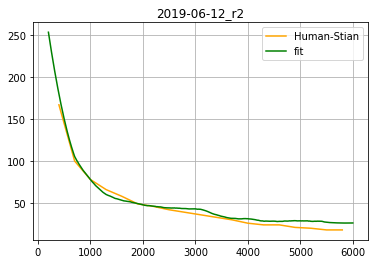

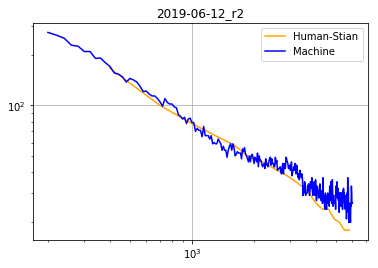

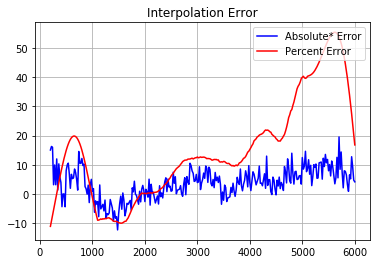

In [4]:
csvDir = '/home/stian/Desktop/testVid/r2/MLCSV/*.dat'
jsonDir = '/home/stian/Desktop/testVid/r2/corrected/outIMG/*.json'
title = "2019-06-12_r2"
plotValues(csvDir, jsonDir, title)
loglogValues(csvDir, jsonDir, title)
interpolation(csvDir,jsonDir,'Interpolation Error')

## 2019-06-12_r3

/home/stian/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


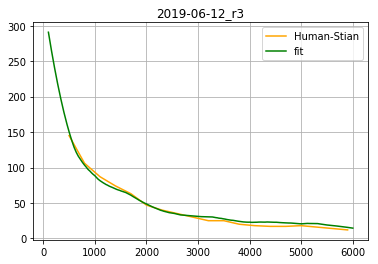

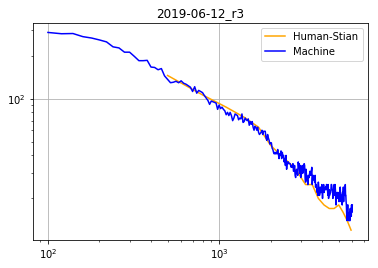

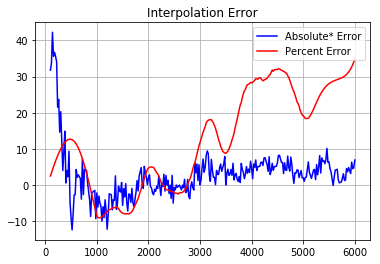

In [5]:
csvDir = '/home/stian/Desktop/testVid/r3/MLCSV/*.dat'
jsonDir = '/home/stian/Desktop/testVid/r3/corrected/outIMG/*.json'
title = "2019-06-12_r3"
plotValues(csvDir, jsonDir, title)
loglogValues(csvDir, jsonDir, title)
interpolation(csvDir,jsonDir,'Interpolation Error')

## 2019-06-12_r4

/home/stian/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


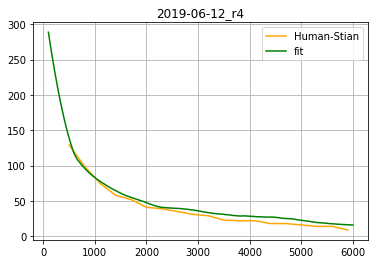

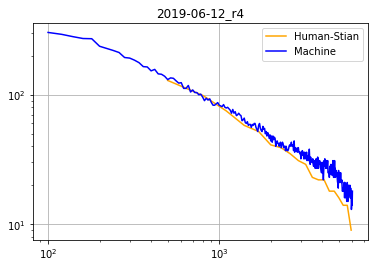

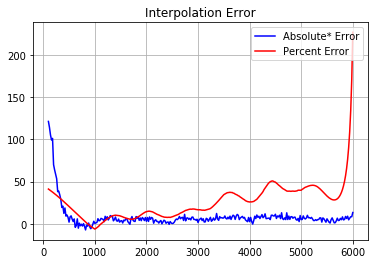

In [6]:
csvDir = '/home/stian/Desktop/testVid/r4/CSV/*.dat'
jsonDir = '/home/stian/Desktop/testVid/r4/corrected/outIMG/*.json'
title = "2019-06-12_r4"
plotValues(csvDir, jsonDir, title)
loglogValues(csvDir, jsonDir, title)
interpolation(csvDir,jsonDir,'Interpolation Error')

## Simulation data

/home/stian/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


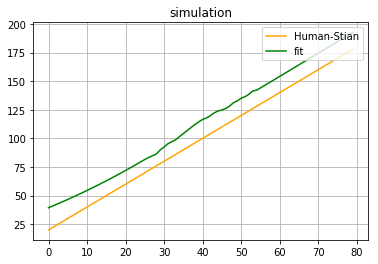

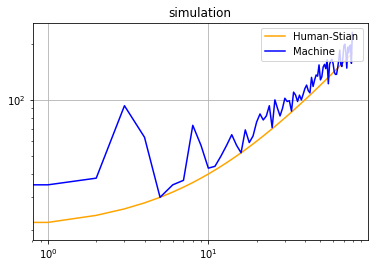

In [51]:
csvDir = '/home/stian/Desktop/testVid/simulation/CSV/*.txt'
jsonDir = '/home/stian/Desktop/testVid/simulation/outIMG/*.json'
title = "simulation"
plotValues(csvDir, jsonDir, title)
loglogValues(csvDir, jsonDir, title)

## 2019-06-12_r4 -- manual select crop

/home/stian/anaconda3/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


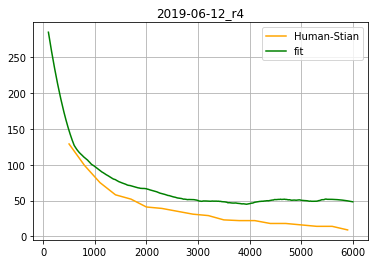

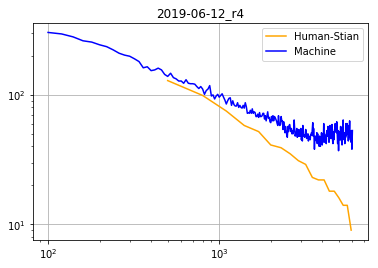

In [52]:
csvDir = '/home/stian/Desktop/testVid/r4 (copy)/CSV/*.dat'
jsonDir = '/home/stian/Desktop/testVid/r4 (copy)/corrected/outIMG/*.json'
title = "2019-06-12_r4"
plotValues(csvDir, jsonDir, title)
loglogValues(csvDir, jsonDir, title)